In [5]:
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
train_dir = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
test_dir = "/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test"

img_height, img_width = 64, 64
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 87000 files belonging to 29 classes.
Using 69600 files for training.


I0000 00:00:1746645107.709115      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746645107.709918      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


In [6]:
model = Sequential([
    
    Input(shape=(64, 64, 3)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),
    
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(29, activation='softmax')  
])

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - accuracy: 0.3208 - loss: 2.6216 - val_accuracy: 0.9032 - val_loss: 0.3257
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8727 - loss: 0.3692 - val_accuracy: 0.9795 - val_loss: 0.0711
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.9397 - loss: 0.1792 - val_accuracy: 0.9772 - val_loss: 0.0675
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.9638 - loss: 0.1088 - val_accuracy: 0.9875 - val_loss: 0.0398
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.9715 - loss: 0.0880 - val_accuracy: 0.9932 - val_loss: 0.0202
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.9763 - loss: 0.0729 - val_accuracy: 0.9960 - val_loss: 0.0126
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.9814 - loss: 0.0614 - val_accuracy: 0.9951 - val_loss: 0.0165
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.9828 -

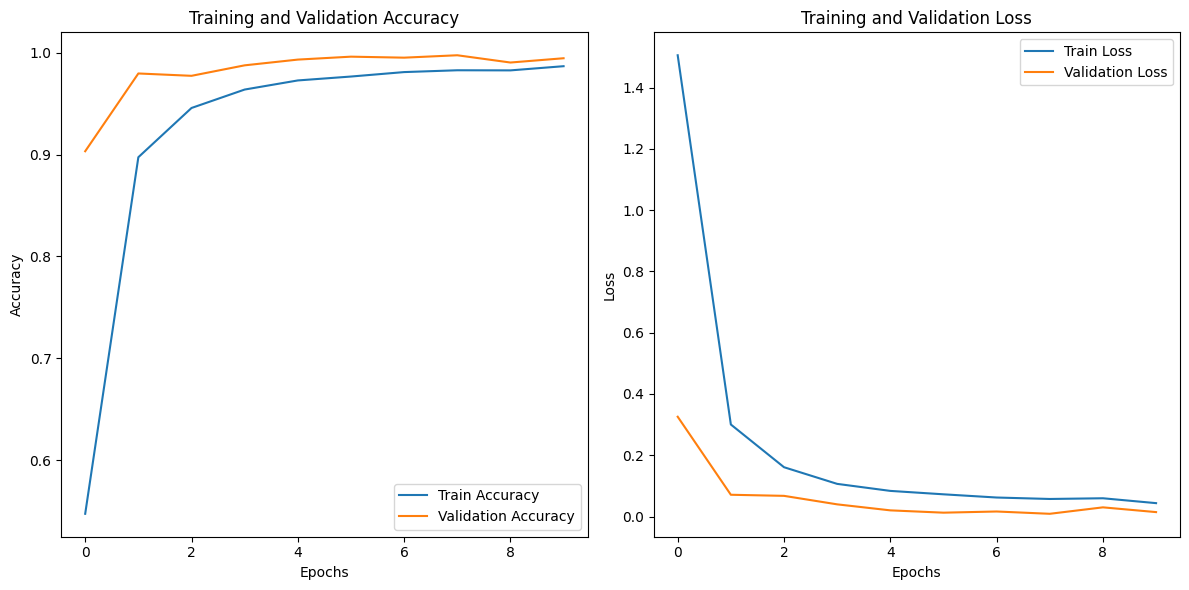

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
img_height, img_width = 64, 64
batch_size = 32 

test_images = []
test_filenames = os.listdir(test_dir)  

for img_filename in test_filenames:
    img_path = os.path.join(test_dir, img_filename)
    
    if os.path.isfile(img_path):  
        img = image.load_img(img_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img)  
        img_array = np.expand_dims(img_array, axis=0)
        test_images.append(img_array)

test_images = np.vstack(test_images)  

predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [14]:
model.save("/kaggle/working/asl_model.h5")